In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from plot_decision_surface import plot_ds


In [64]:
# Load data
dataObj = load_wine()
print(dataObj["DESCR"])
X = dataObj.data
y = dataObj.target


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [65]:
# Create DataFrame with features
dfori = pd.DataFrame(X)
dfori.columns = dataObj.feature_names


In [66]:
# Add class column
dfori.insert(loc=0, column="Class", value=y)


In [67]:
dfori.head()


,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


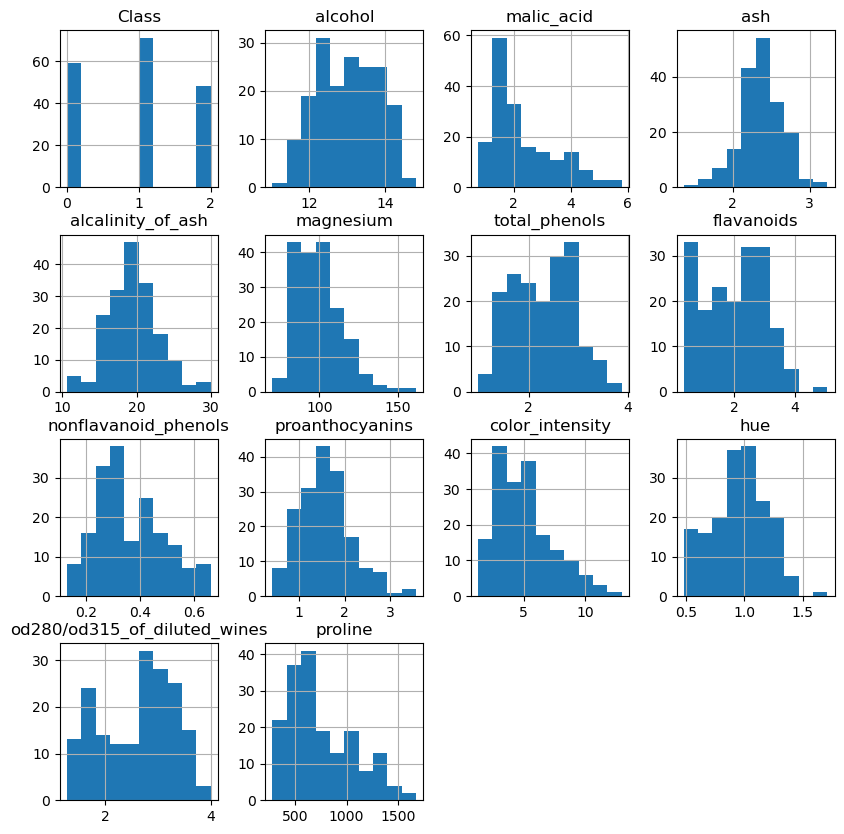

In [68]:
dfori.hist(figsize=(10,10))
display()

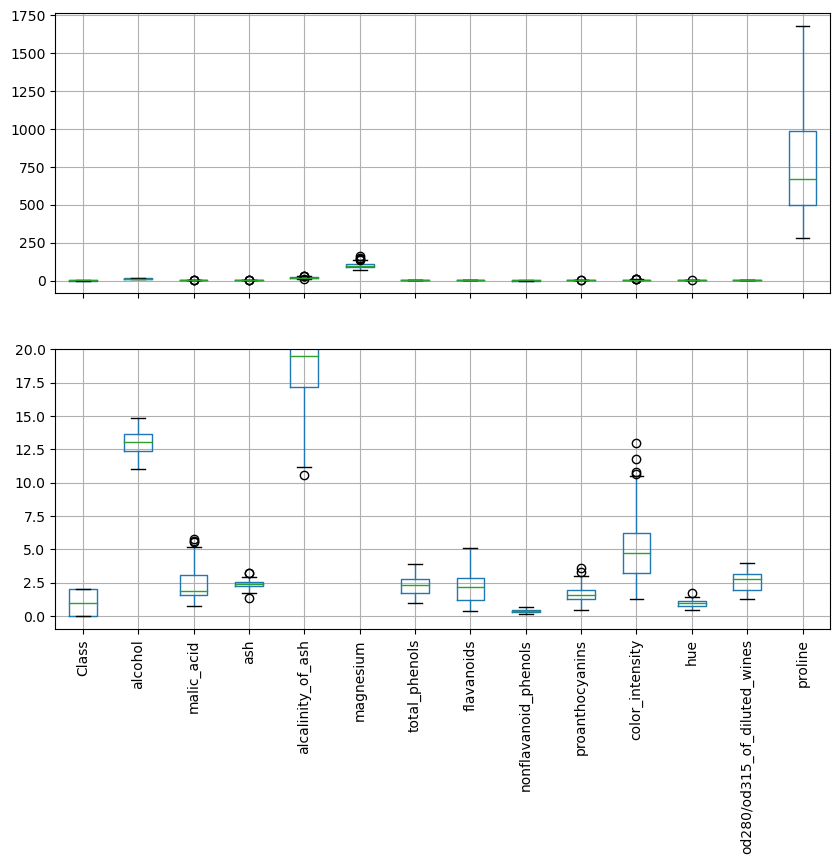

In [69]:
fig, axes = plt.subplots(2,1, sharey=False, figsize=(10,8))
dfori.iloc[:,:].boxplot(ax=axes[0])
dfori.iloc[:,:].boxplot(ax=axes[1])
axes[0].set_xticklabels([])
axes[1].set_ylim(-1,20)
axes[1].tick_params(axis='x', labelrotation=90)
display()

In [70]:
# Filter class 0 and 1
filt = (dfori["Class"] == 0) | (dfori["Class"] == 1)
# df = dfori.loc[filt]
df= dfori


In [71]:
# Extract two features
X = df[["alcohol", "malic_acid"]].values
y = df["Class"].values



In [72]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y
)



In [73]:
# Standardize data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [74]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(C=0.005, random_state=0)
dt = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=0)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
estimators = [("lr", lr), ("dt", dt), ("knn", knn)]


vc = VotingClassifier(estimators=estimators, voting="soft")



In [75]:
def calc_result(clf, X, y):
    y_pred = clf.predict(X)
    y_pred = y_pred.ravel() # In case the result is not flat array
    acc = accuracy_score(y, y_pred)
    sumMiss = (y != y_pred).sum()
    return acc, sumMiss

In [76]:
# Training and displaying results
names = [
    "Logistic Regression",
    "Decision Tree",
    "K-Nearest Neighbor",
    "Voting Classifier",
]
clfs = [lr, dt, knn, vc]
data = []

for clf, name in zip(clfs, names):
    clf.fit(X_train_std, y_train)
    acc_train, miss_train = calc_result(clf, X_train_std, y_train)
    acc_test, miss_test = calc_result(clf, X_test_std, y_test)
    data.append({
        "names": name, 
        "ACC_train": acc_train,
        "ACC_test": acc_test,
    })

dfResult = pd.DataFrame.from_dict(data)
display(dfResult)



c:\Users\nnnpo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\nnnpo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,names,ACC_train,ACC_test
0,Logistic Regression,0.660377,0.680556
1,Decision Tree,0.830189,0.791667
2,K-Nearest Neighbor,0.839623,0.819444
3,Voting Classifier,0.830189,0.791667


c:\Users\nnnpo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


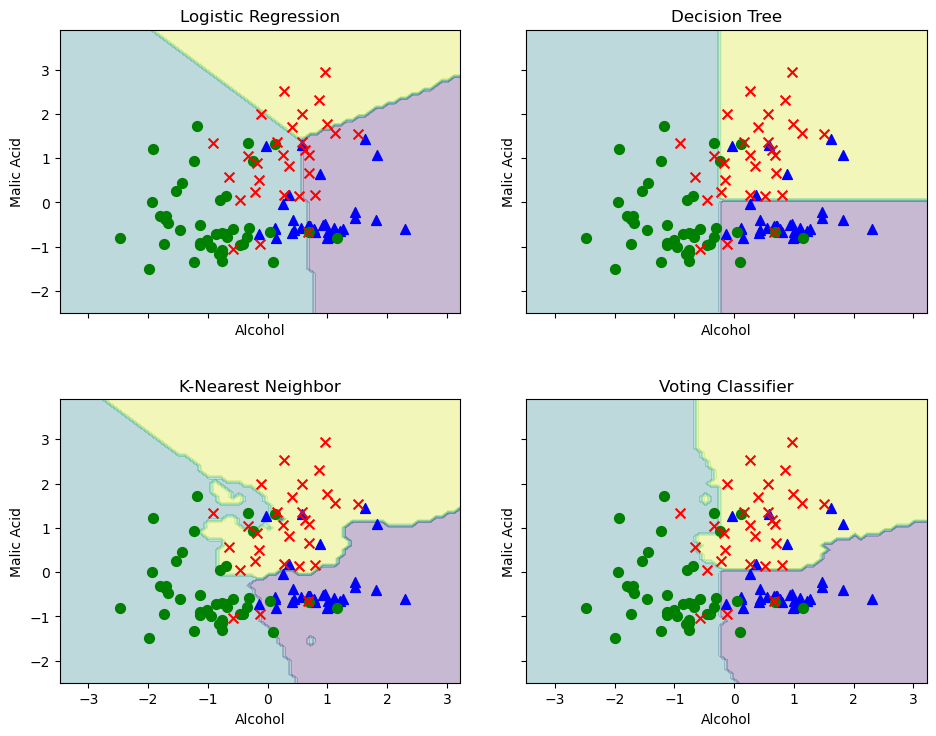

In [ ]:
plot_ds(clfs, names, X_train_std, y_train, X_train_std, y_train)

c:\Users\nnnpo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


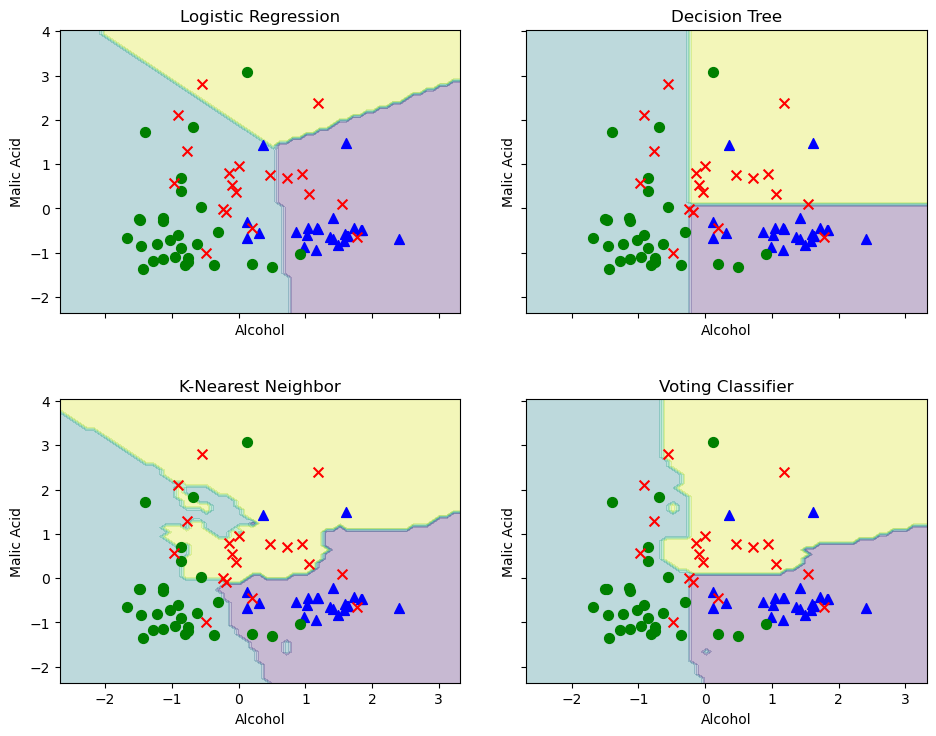

In [ ]:
plot_ds(clfs, names, X_train_std, y_train, X_test_std, y_test)